# Распределение величин

Имеем следующую формулу:
$$
Tai_0(G) = \sum_{\sigma \in \{-1,1\}^V} {\det}' \mathcal{M} \left[ \frac{i}{\sqrt 3} \right]^{rank \mathcal{ M}}
$$

Интересует распределение этих значений — миноров и рангов матрицы граней

In [1]:
import os

import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("darkgrid")
sns.set_context("notebook")
sns.set_palette("viridis")

## 1. Download

Скачаем все файлы с Гугл диска (либо можно пропустить и собрать данные самим)

In [2]:
data_dir = "../assets/data"
os.makedirs(data_dir, exist_ok=True)

# Uncomment to download data

# !pip install gdown -q
# import gdown
# gdown.download_folder(
#     url="https://drive.google.com/drive/folders/1aWnVLwRHkxQDhAz86DHr9jipaShbzTHt?usp=drive_link",
#     output=data_dir
# )

## 2. Visuals

In [3]:
def visualize_det_rank(det_list, rank_list, total_coloring: int, graph_name: str | None = "", ax=None) -> None:
    total_zero = (rank_list == 0).sum()

    if ax is None:
        plt.figure(figsize=(8, 6))
        ax = plt.gca()

    # Use barplot to show counts split by det values
    sns.barplot(
        x=rank_list,
        y=rank_list,  # This will be the count in our case
        hue=det_list,
        estimator=lambda x: len(x),  # Count the number of occurrences
        errorbar=None,  # Don't show error bars
        palette={1: "skyblue", -1: "salmon"},  # Colors for 1 and -1
        hue_order=[-1, 1],
        ax=ax
    )

    # Customize the plot
    ax.set_title(
        f"Распределение рангов матрицы граней графа {graph_name}\n(Всего раскрасок {total_coloring}; нулевых значений: {total_zero})"
    )
    ax.set_xlabel("Ранг")
    ax.set_ylabel("Количество")

    # Adjust legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles,
        ["${\det}' \mathcal{M} = -1$", "${\det}' \mathcal{M} = +1$"],
        title="Минор",
    )

    plt.tight_layout()

## 3. $K_4$

<img src="../assets/img/k4.png" width=500>

In [4]:
k4 = pd.read_csv(os.path.join(data_dir, "k4.csv"))

k4["Гауссова сумма"] = k4["Гауссова сумма"].apply(sp.nsimplify)
k4_total = sp.nsimplify(k4["Гауссова сумма"].sum())

print(f"Shape: {k4.shape}; total Tait coloring: {k4_total}")
k4.head(2)

Shape: (16, 7); total Tait coloring: 2


,Ранг,Минор,Гауссова сумма,A,B,C,D
0,3,-1,sqrt(3)*I/9,-1,-1,-1,-1
1,3,-1,sqrt(3)*I/9,-1,-1,-1,1


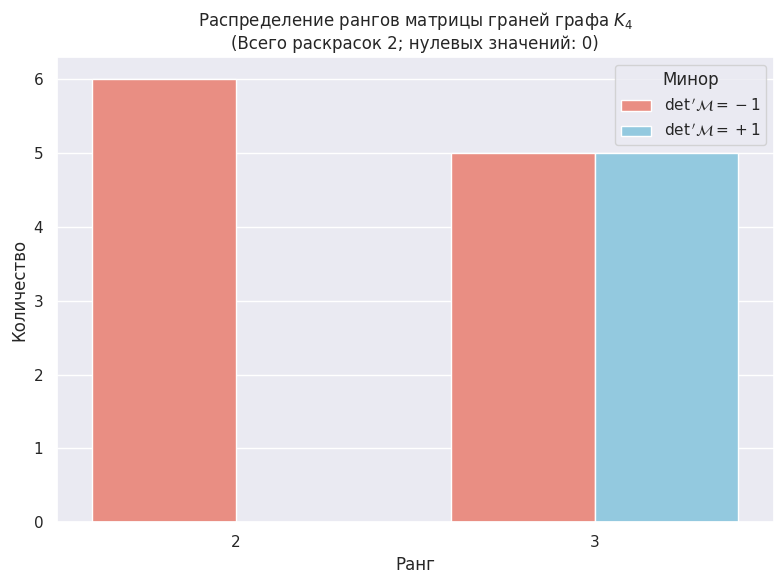

In [5]:
visualize_det_rank(k4["Минор"], k4["Ранг"], total_coloring=k4_total, graph_name="$K_4$")

## 4. $CL$

$CL_3, CL_4, CL_5, CL_6$

<img src="../assets/img/cl3.png" width=500>
<img src="../assets/img/cl4.png" width=500>

<img src="../assets/img/cl5.png" width=500>
<img src="../assets/img/cl6.png" width=500>

In [6]:
cl3 = pd.read_csv(os.path.join(data_dir, "cl3.csv"))
cl3["Гауссова сумма"] = cl3["Гауссова сумма"].apply(sp.nsimplify)
cl3_total = sp.nsimplify(cl3["Гауссова сумма"].sum())
print(f"CL_3. Shape: {cl3.shape}; total Tait coloring: {cl3_total}")


cl4 = pd.read_csv(os.path.join(data_dir, "cl4.csv"))
cl4["Гауссова сумма"] = cl4["Гауссова сумма"].apply(sp.nsimplify)
cl4_total = sp.nsimplify(cl4["Гауссова сумма"].sum())
print(f"CL_4. Shape: {cl4.shape}; total Tait coloring: {cl4_total}")

cl5 = pd.read_csv(os.path.join(data_dir, "cl5.csv"))
cl5["Гауссова сумма"] = cl5["Гауссова сумма"].apply(sp.nsimplify)
cl5_total = sp.nsimplify(cl5["Гауссова сумма"].sum())
print(f"CL_5. Shape: {cl5.shape}; total Tait coloring: {cl5_total}")

cl6 = pd.read_csv(os.path.join(data_dir, "cl6.csv"))
cl6["Гауссова сумма"] = cl6["Гауссова сумма"].apply(sp.nsimplify)
cl6_total = sp.nsimplify(cl6["Гауссова сумма"].sum())
print(f"CL_5. Shape: {cl6.shape}; total Tait coloring: {cl6_total}")

CL_3. Shape: (64, 9); total Tait coloring: 2
CL_4. Shape: (256, 11); total Tait coloring: 8
CL_5. Shape: (1024, 13); total Tait coloring: 10
CL_5. Shape: (4096, 15); total Tait coloring: 24


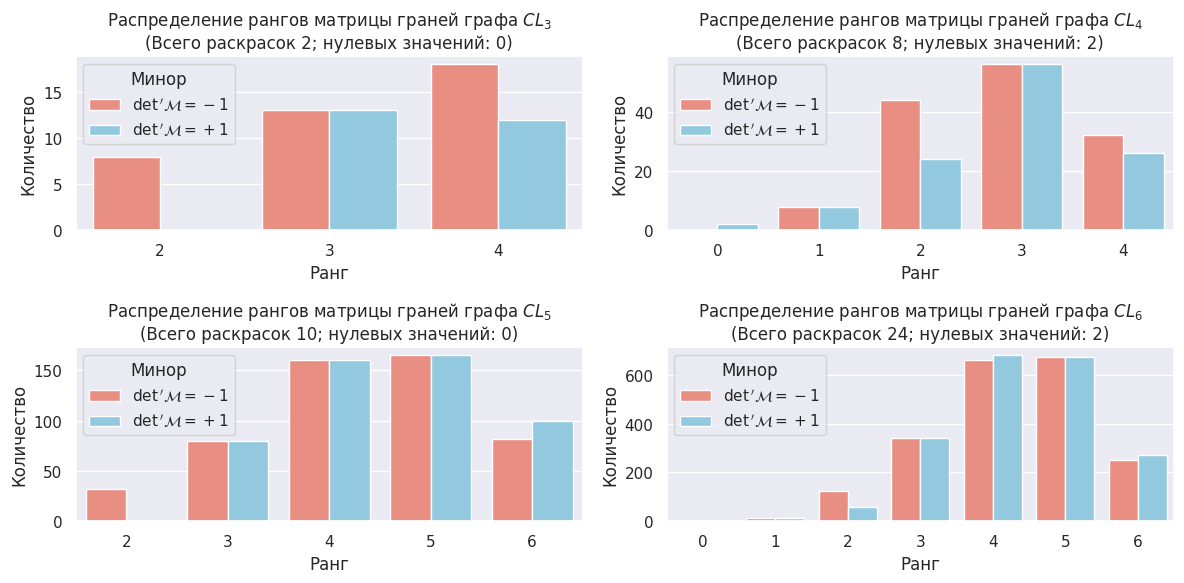

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))


visualize_det_rank(
    cl3["Минор"],
    cl3["Ранг"],
    total_coloring=cl3_total,
    graph_name="$CL_3$",
    ax=ax[0][0],
)
visualize_det_rank(
    cl4["Минор"],
    cl4["Ранг"],
    total_coloring=cl4_total,
    graph_name="$CL_4$",
    ax=ax[0][1],
)
visualize_det_rank(
    cl5["Минор"],
    cl5["Ранг"],
    total_coloring=cl5_total,
    graph_name="$CL_5$",
    ax=ax[1][0],
)
visualize_det_rank(
    cl6["Минор"],
    cl6["Ранг"],
    total_coloring=cl6_total,
    graph_name="$CL_6$",
    ax=ax[1][1],
)

## Другие графы

### Граф 1

$CL_5$, но на внутренней грани проделываем операцию как в минимальном контрпримере

<img src="../assets/img/graph_1.png" width=500>

In [8]:
graph_1 = pd.read_csv(os.path.join(data_dir, "graph_1.csv"))
graph_1["Гауссова сумма"] = graph_1["Гауссова сумма"].apply(sp.nsimplify)
graph_1_total = sp.nsimplify(graph_1["Гауссова сумма"].sum())
print(f"Shape: {graph_1.shape}; total Tait coloring: {graph_1_total}")

Shape: (256, 11); total Tait coloring: 2


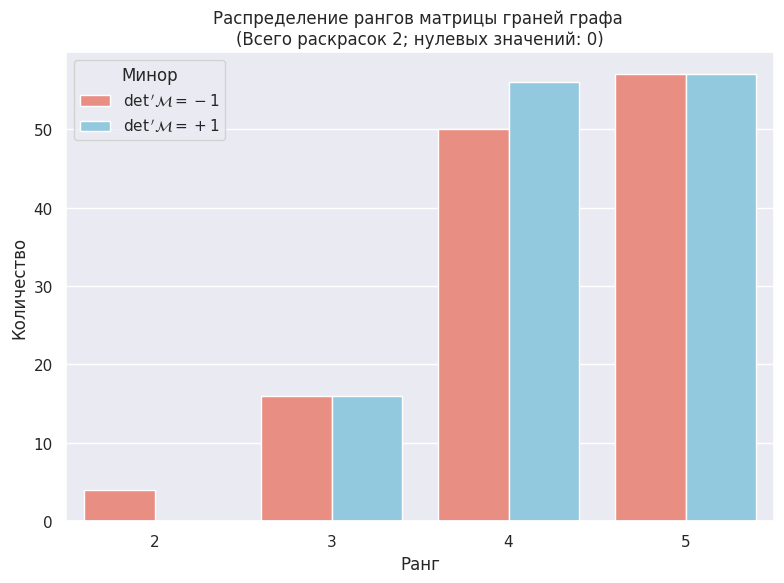

In [9]:
visualize_det_rank(
    graph_1["Минор"],
    graph_1["Ранг"],
    total_coloring=graph_1_total
)

### Граф 2

Граф, в котором есть две грани-пятиугольника


<img src="../assets/img/graph_2.png" width=500>

In [10]:
graph_2 = pd.read_csv(os.path.join(data_dir, "graph_2.csv"))
graph_2["Гауссова сумма"] = graph_2["Гауссова сумма"].apply(sp.nsimplify)
graph_2_total = sp.nsimplify(graph_2["Гауссова сумма"].sum())
print(f"Shape: {graph_2.shape}; total Tait coloring: {graph_2_total}")

Shape: (1024, 13); total Tait coloring: 2


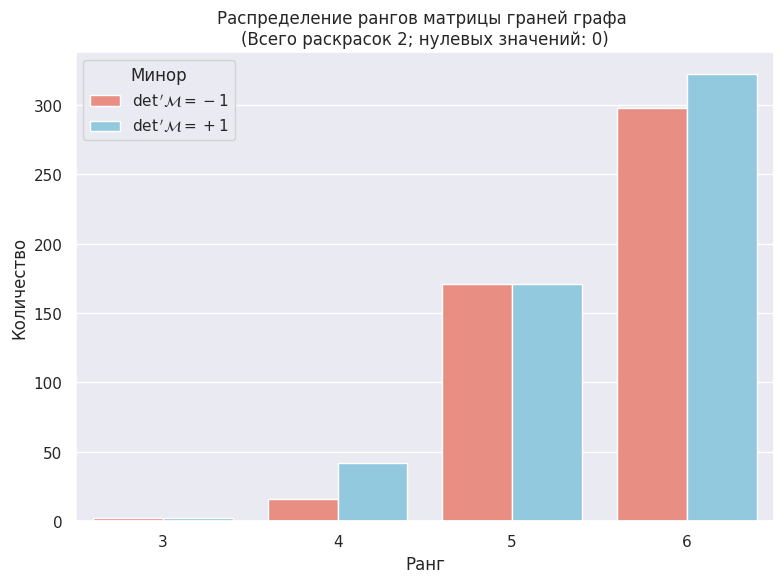

In [11]:
visualize_det_rank(graph_2["Минор"], graph_2["Ранг"], total_coloring=graph_2_total)